# FM / PM

## Objective

This experiment aims:

1. To study and practice the generation and demodulation of Angle Modulated waves.

## Introduction

In this experiment, you will practice FM and PM generation and demodulation.
Please refer to the textbook and lecture notes for theory part.

## Procedure

### Frequency Modulation: Generation

In [12]:
function y = integ(x)
% INTEG Integration
% Integ evaluates the integraion of x using CUMSUM function
% Integration equals the summation muliplied by Delta 

y  = cumsum(x)/length(x);
end

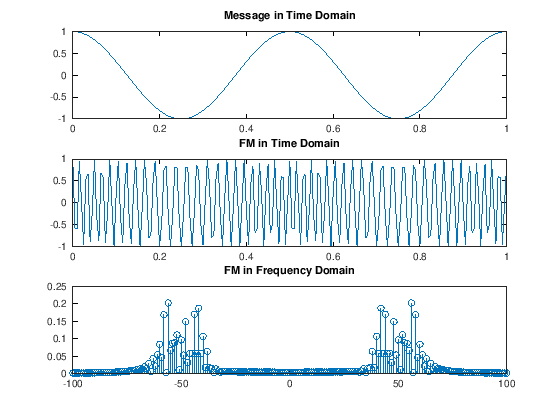

In [13]:
% Frequency Modulation
% performs FM and plots the message and FM waves
% in both time and frequency domain

clear all;
beta = 5;              % Deviation ration or Modulation index
fs   = 2e2;              % sampling frequency
t    = 0 : 1/fs : 1;     % time vector
f    = -fs/2 : 1 : fs/2; % frequency vector
fm   = 2;                % message frequency
fc   = 50;               % carrier frequency
m    = cos(2*pi*fm*t);   % message signal
a    = integ(m);         % integration of message 
wm   = 2*pi*fm;          % message angular frequency
yfm  = cos(2*pi*fc*t + beta*wm*a); % FM wave
YFM  = sig_spec(yfm);    % FM spectrum

figure();
subplot(311);plot(t,m); title('Message in Time Domain')
subplot(312);plot(t,yfm); title('FM in Time Domain')
subplot(313);stem(f,YFM); title('FM in Frequency Domain')

---

### Phase Modulation: Generation

In [14]:
function [ypm YPM t f] = pm_mod(fm,beta)
% PM_MOD Phase Modulation
% PM_MOD performs PM and plots the message and PM waves
% in both time and frequency domain
% y = pm_mod(fm,beta)
% y is PM wave
% fm is message tone frequency Hz
% beta is deviation ratio

fc  = 25 * fm;
fs  = 4 * fc;
t   = 0 : 1/fs : 1;
f   = -fs/2 : 1 : fs/2;
m   = cos(2*pi*fm*t);
ypm = cos(2*pi*fc*t + beta*m);
YPM = sig_spec(ypm);

figure();
subplot(311);plot(t,m)
subplot(312);plot(t,ypm)
subplot(313);stem(f,YPM)
end

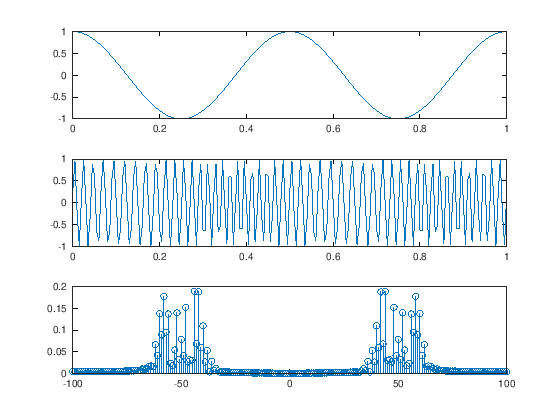

In [15]:
[ypm YPM t f] = pm_mod(2,5);

-----------------

### Frequency Modulation: Demodulation

In [16]:
function y = differ(x)
% DIFFER differentiation
% Differ evaluates the differentiation of x using DIFFER function
% differentiation equals the summation muliplied by Delta 
y  = diff(x);
y  = [y y(end)];
end

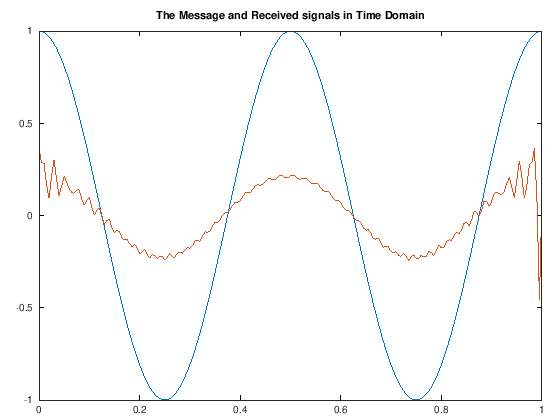

In [17]:
% FM Demodulation Using Frequency discriminator & Envelope detector
det = differ(yfm);
e  = abs( hilbert(det));
r  = (e - mean(e));

figure();
plot(t,m); 
hold on;
plot(t,r); title('The Message and Received signals in Time Domain')

-----------------

### Phase Modulation: Demodulation

In [18]:
function y = pm_demod(x)
% PM_DEMOD Phase Demodulation
% PM_DEMOD performs PM detection
% y = pm_demod(x)
% y is received wave
% x is PM wave

% PM Demodulation Using ideal differentiator & Envelope detector
det = differ(x);
e  = abs( hilbert(det));
y  = (e - mean(e));
end

In [19]:
function y = pm_demod2(x,fm,fs)
% PM_DEMOD Phase Demodulation
% PM_DEMOD performs PM detection
% y = pm_demod(x)
% y is received wave
% x is PM wave
% fm is message frequency
% fs is sampling frequency

% PM Demodulation Using ideal differentiator & Envelope detector
Det    = differ(x);
xsq    = Det .* Det;
e      = (xsq - mean(xsq));
pkg load signal;
[b, a] = butter(2,2*fm/(fs/2));
y      = filter(b, a, e);
end

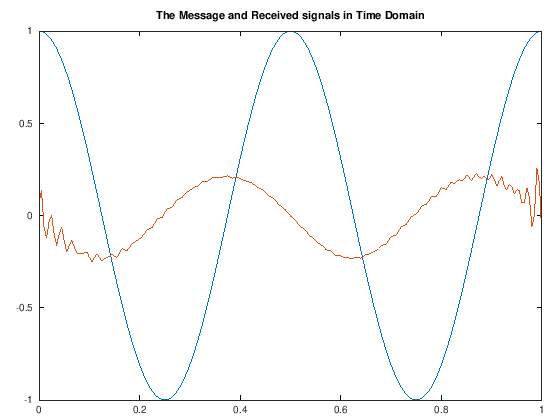

In [20]:
rpm = pm_demod(ypm);
figure();
plot(t,m); 
hold on;
plot(t,rpm); title('The Message and Received signals in Time Domain')

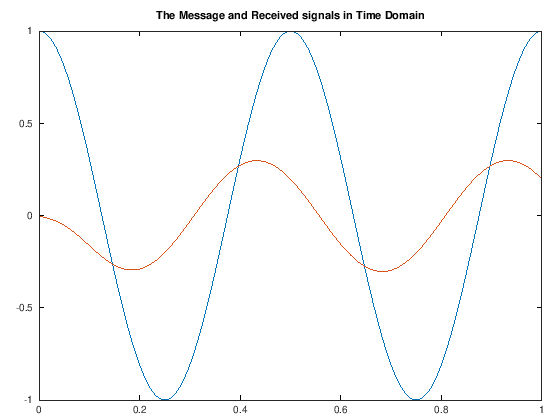

In [22]:
rpm = pm_demod2(ypm,fm,fs);
figure();
plot(t,m); 
hold on;
plot(t,rpm); title('The Message and Received signals in Time Domain')

Discussion

* Use different values of beta, deviation ration, that yields narrowband and wideband angle modulated waves.
* For each beta, determine the bandwidth for both FM and PM. use two methods: carson rule and signals spectra.
* Comment on beta affect upon bandwidth utilization and received signal qualtiy
